In [1]:
!python --version

Python 3.7.12


In [2]:
!pip install matplotlib pandas numpy sklearn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./food_truck_dataset.csv', header=None)

In [5]:
df.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
X = list(df[0])
Y = list(df[1])

l_rate = 0.001

In [7]:
n = len(X)
x_sum, y_sum, xy_sum, x_sum_sq, y_sum_sq = 0, 0, 0, 0, 0

for x, y in zip(X, Y):
    x_sum += x
    y_sum += y
    xy_sum += (x * y)
    x_sum_sq += (x ** 2)
    y_sum_sq += (y ** 2)

x_mean = x_sum / n
y_mean = y_sum / n
xy_mean = xy_sum / n

In [8]:
x_std = 0
y_std = 0

for x, y in zip(X, Y):
    x_std += ((x - x_mean) ** 2)
    y_std += ((y - y_mean) ** 2)

x_std = (x_std / n) ** 0.5
y_std = (y_std / n) ** 0.5

In [9]:
# coeff of regression

r = xy_sum / (x_sum_sq * y_sum_sq)
r

0.00012897984786377177

In [10]:
# slope

m = r * (y_std / x_std)
m

0.00018365224230874023

In [11]:
# constant

c = y_mean - (m * x_mean)
c

5.8376364859795995

In [12]:
pred = []

for x in X:
    pred.append(m * x + c)

pred[:10]

[5.83875861954533,
 5.838651660479409,
 5.839200945970931,
 5.838922639362936,
 5.838712651389081,
 5.83917602436165,
 5.839009543603996,
 5.839211873279348,
 5.8388276911536625,
 5.838564774603573]

In [13]:
def grad_des(m, c):
    pred = []
    
    for x in X:
        pred.append(m * x + c)

    m_grad = (-2 / n) * sum([x * (y - pred[i]) for i, (x, y) in enumerate(zip(X, Y))])
    c_grad = (-2 / n) * sum([(y - pred[i]) for i, (_, y) in enumerate(zip(X, Y))])

    m -= (l_rate * m_grad)
    c -= (l_rate * c_grad)

    return m, c, pred

In [14]:
res = []

for _ in range(100000):
    m, c, res = grad_des(m, c)

    # print(m, c)

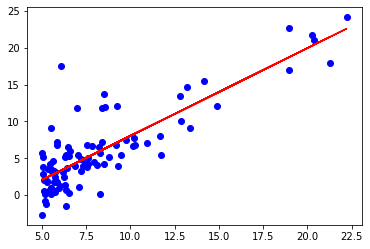

In [15]:
plt.scatter(X, Y, color="blue")
plt.plot(X, res, color="red")
plt.show()

In [16]:
sse = sum([(Y[i] - res[i]) ** 2 for i in range(n)])
ssr = sum([(res[i] - y_mean) ** 2 for i in range(n)])
sst = sum([(Y[i] - y_mean) ** 2 for i in range(n)])
r_sq = 1 - (sse / sst)

print(f"Sum Sq Error / cost: {sse}")
print(f"Sum Sq Reg: {ssr}")
print(f"Sum Sq Total: {sst}")
print(f"Coeff of determination: {r_sq}")

Sum Sq Error / cost: 868.5324469391848
Sum Sq Reg: 2046.3146047178184
Sum Sq Total: 2914.8470516572247
Coeff of determination: 0.7020315537841397
